In [137]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

#Import the libraries
import math

In [138]:
import pandas_datareader as web

In [139]:
import numpy as np

In [140]:
import pandas as pd

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
from keras.models import Sequential

In [143]:
from keras.layers import Dense, LSTM

In [144]:
import matplotlib.pyplot as plt

In [145]:
plt.style.use('fivethirtyeight')

In [181]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-06-05')

In [182]:
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-06-01,322.350006,317.209991,317.750000,321.850006,20197800.0,321.850006
2020-06-02,323.440002,318.929993,320.750000,323.339996,21910700.0,323.339996
2020-06-03,326.200012,322.299988,324.660004,325.119995,26122800.0,325.119995


In [148]:
df.shape

(2003, 6)

In [149]:
#Visualize the closing price history
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Close Price History')

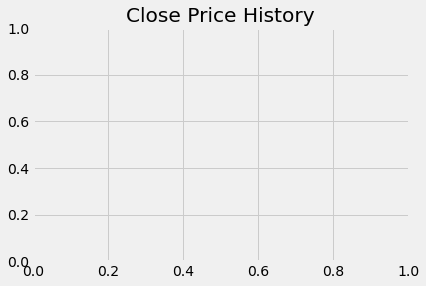

In [150]:
plt.title('Close Price History')

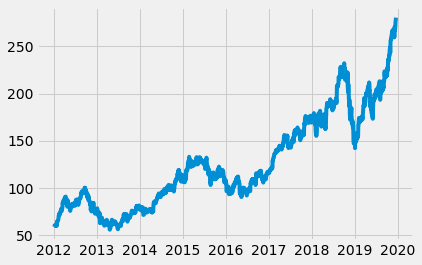

In [151]:
plt.plot(df['Close'])

Text(0.5, 0, 'Date')

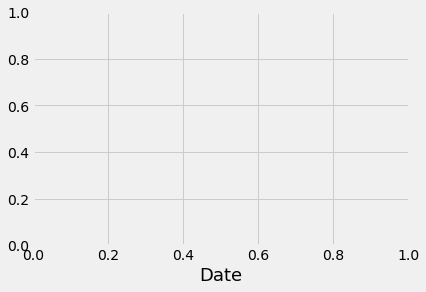

In [152]:
plt.xlabel('Date',fontsize=18)

Text(0, 0.5, 'Close Price USD ($)')

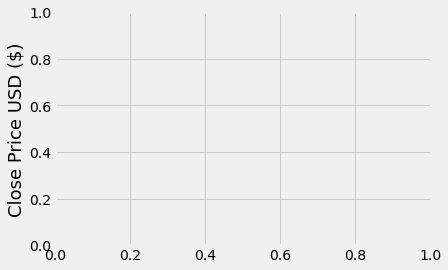

In [153]:
plt.ylabel('Close Price USD ($)',fontsize=18)

In [180]:
plt.show()

In [155]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

In [156]:
#Converting the dataframe to a numpy array
dataset = data.values

In [183]:
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [184]:
training_data_len

1603

In [158]:
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

In [185]:
scaled_data = scaler.fit_transform(dataset)

In [186]:
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [160]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]

In [161]:
#Split the data into x_train and y_train data sets
x_train=[]

In [162]:
y_train = []

In [163]:
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [164]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [165]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [166]:
#Build the LSTM network model
model = Sequential()

In [167]:
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))

In [168]:
model.add(LSTM(units=50, return_sequences=False))

In [169]:
model.add(Dense(units=25))

In [170]:
model.add(Dense(units=1))

In [171]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [187]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1543/1543 [==============================] - 60s 39ms/step - loss: 2.7497e-04


In [173]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [174]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [175]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [176]:
#Getting the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#Undo scaling

In [177]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

18.264248084257904

/Users/kalyan.subramanian/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


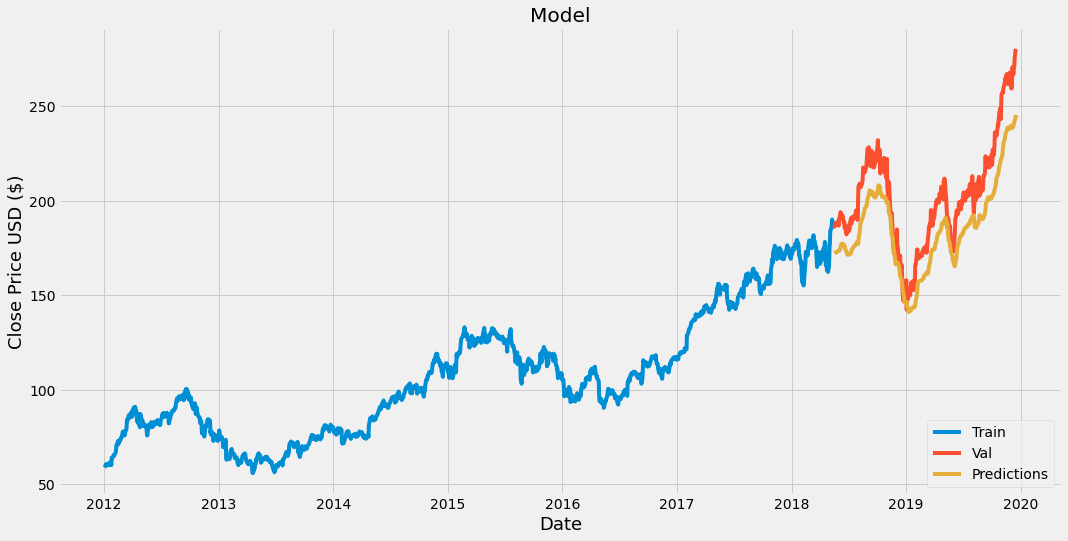

In [178]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [179]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,172.351334
2018-05-18,186.309998,172.460159
2018-05-21,187.630005,172.402237
2018-05-22,187.160004,172.492020
2018-05-23,188.360001,172.571411
...,...,...
2019-12-11,270.769989,240.861389
2019-12-12,271.459991,241.687576
2019-12-13,275.149994,242.518112


In [135]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-06-08')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[172.67662]]


In [136]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-06-08', end='2020-05-08')
print(apple_quote2['Close'])

Date
2020-06-08    333.459991
Name: Close, dtype: float64
